In [2]:
import sys
sys.path.insert(1, './lib/python3.7/site-packages')
import pandas as pd
import googletrans as GT
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

Extracting the Data

In [3]:
data=pd.read_csv("amazon.csv",encoding="ISO-8859-1",thousands=".")
data=data.replace(0,np.nan)
newdata=data.dropna(subset=['number'])
newdata.loc['number']=newdata['number'].astype(int)

C:\Users\adars\AppData\Local\Temp\ipykernel_16512\3890029067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata.loc['number']=newdata['number'].astype(int)


Dataset Adjustments

In [4]:
ffpm= newdata.groupby('month')['number'].sum()
months_unique = list(data.month.unique())
ffpm = ffpm.reindex(months_unique, axis=0) 
ffpm = ffpm.to_frame()
ffpm.reset_index(level=0, inplace=True)

In [5]:
translator = GT.Translator() 
for i, m in enumerate(ffpm['month']):
    translated = translator.translate(m)  
    month = translated.text    
    ffpm.at[i, 'month'] = month

Plotting the Data

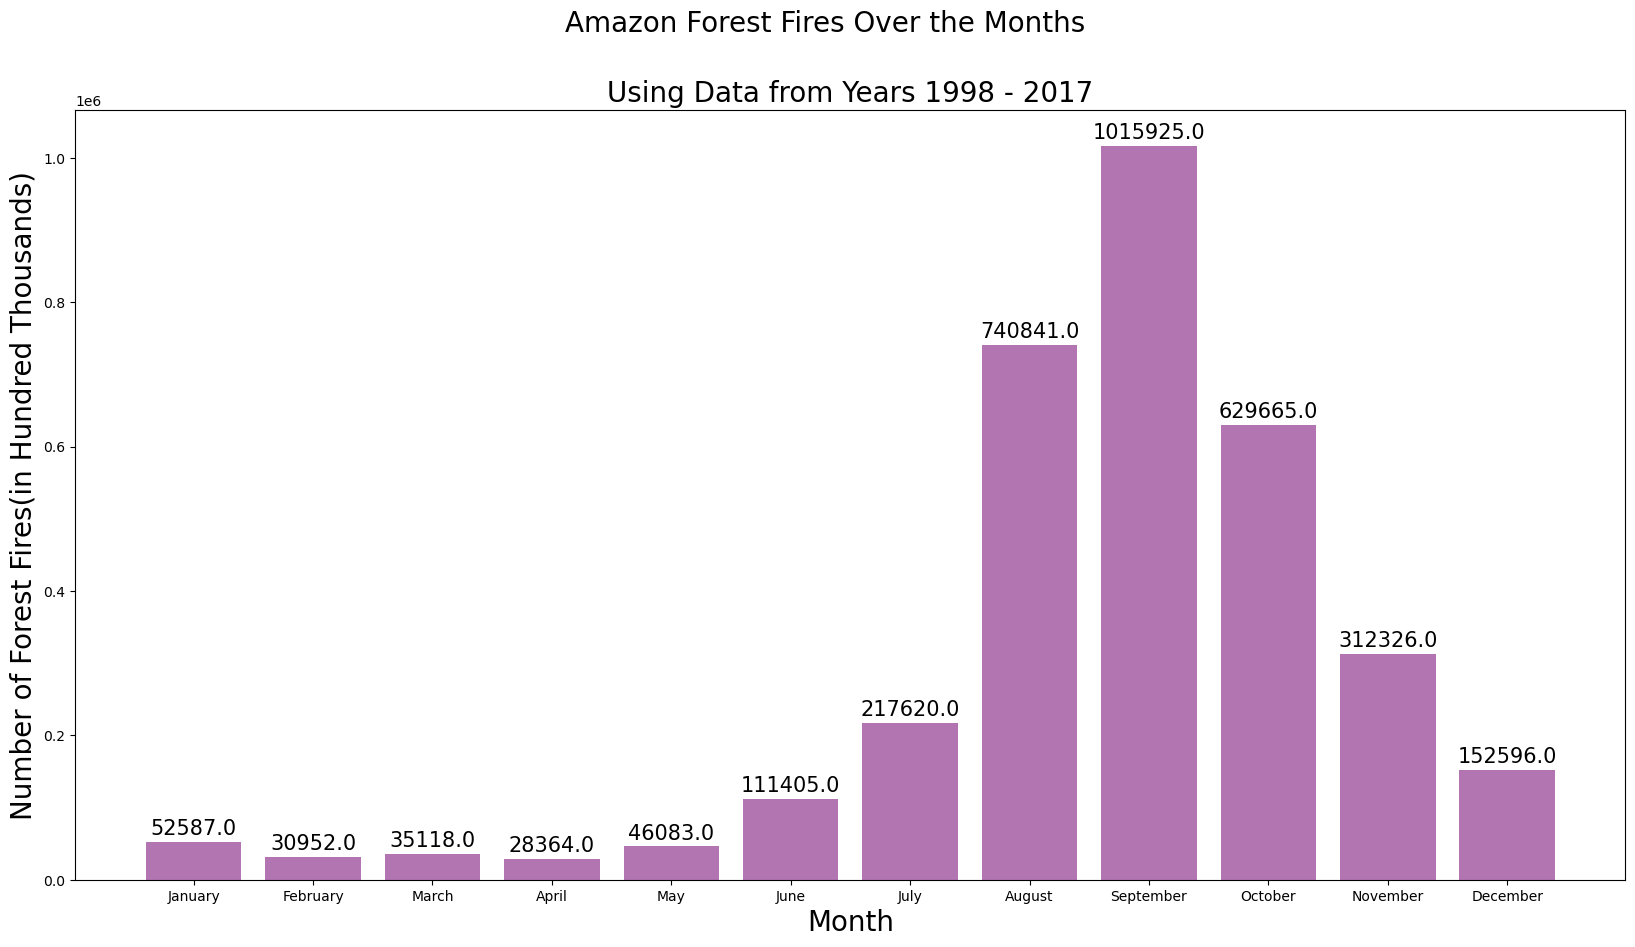

In [10]:
plt.figure(figsize=(20, 10)) 
plt.bar(ffpm['month'],ffpm['number'], color = (0.5,0.1,0.5,0.6))
plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20) 
plt.title('Using Data from Years 1998 - 2017', fontsize=20)  
plt.xlabel('Month', fontsize=20) 
plt.ylabel('Number of Forest Fires(in Hundred Thousands)', fontsize=20)

for i, num in enumerate(ffpm['number']):
    plt.text(i,num + 10000,num,ha='center',fontsize=15)   